# Оператор Собеля

In [1]:
import cv2
import numpy as np

In [2]:
img = cv2.imread('./lena.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

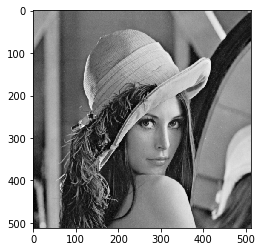

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(img_gray, cmap='gray')
plt.show()

## Оператор собеля для вычисления X и Y составляющих градиента

In [4]:
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
    
sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

## Вычисляем градиенты по осям

In [11]:
grad_x = cv2.filter2D(img_gray, cv2.CV_64F, sobel_x)
grad_x /= np.max(np.abs(grad_x))
grad_y = cv2.filter2D(img_gray, cv2.CV_64F, sobel_y)
grad_y /= np.max(np.abs(grad_y))

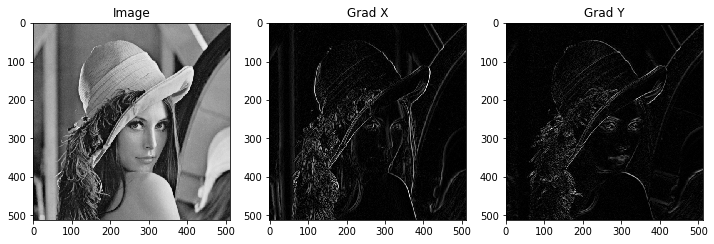

In [12]:
plt.figure(2, figsize=(12, 8))
plt.subplot(131)
plt.imshow(img_gray, cmap='gray')
plt.title('Image')
plt.subplot(132)
plt.imshow(np.abs(grad_x), cmap='gray')
plt.title('Grad X')
plt.subplot(133)
plt.imshow(np.abs(grad_y), cmap='gray')
plt.title('Grad Y');

## Вычисляем суммарный градиент

In [13]:
grad  = np.sqrt(grad_x ** 2 + grad_y ** 2)
theta = np.arctan2(grad_y, grad_x)
theta[theta<0] += 2*np.pi
theta /= np.max(theta)

[]

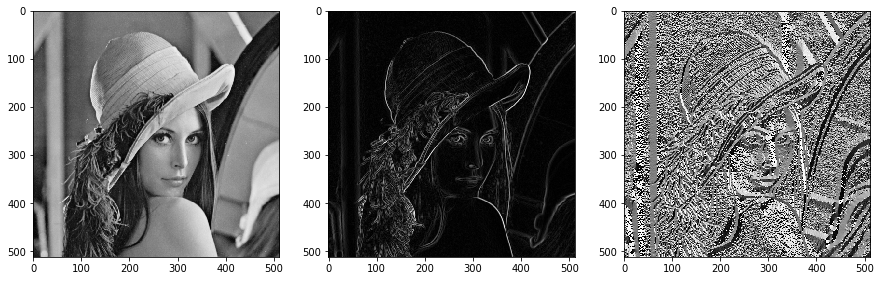

In [19]:
plt.figure(2, figsize=(15, 8))
plt.subplot(131)
plt.imshow(img_gray, cmap='gray')
plt.subplot(132)
plt.imshow(grad, cmap='gray')
plt.subplot(133)
plt.imshow(theta, cmap='gray')
plt.plot()